In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('chromagrams/chroma-nnls_piano_classical.csv', header=None)

chromagram_segment_times = df.iloc[:,1]
Zx_chroma = np.array(df.iloc[:,2:]) 
print(Zx_chroma.shape)
print(chromagram_segment_times.shape)
print(chromagram_segment_times)

(550596, 12)
(550596,)
0           0.0
1           0.1
2           0.2
3           0.3
4           0.4
          ...  
550591    933.1
550592    933.2
550593    933.3
550594    933.4
550595    933.5
Name: 1, Length: 550596, dtype: float64


In [2]:
# chroma = ["C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab", "A", "Bb", "B"]
chroma =  ["A", "Bb", "B", "C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab"]

# copied from elias lab3 
def plt_chromagram(Zx_chroma, segment_times): 
    
    plt.figure(figsize=(30, 6))
    plt.pcolormesh(segment_times, chroma, np.abs(Zx_chroma), cmap=plt.cm.plasma)
    # plt.pcolormesh(segment_times, chroma, 20 * np.log10(np.abs(Zx_chroma)), cmap=plt.cm.plasma)
    plt.title("Chromagram")
    plt.xlabel("Time (s)")
    plt.ylabel("Chroma")

    plt.colorbar()
    plt.show() 

/var/folders/dw/z2t87pzx5cx7mszpwtg70lt00000gn/T/ipykernel_52025/1259480609.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(segment_times, chroma, np.abs(Zx_chroma), cmap=plt.cm.plasma)


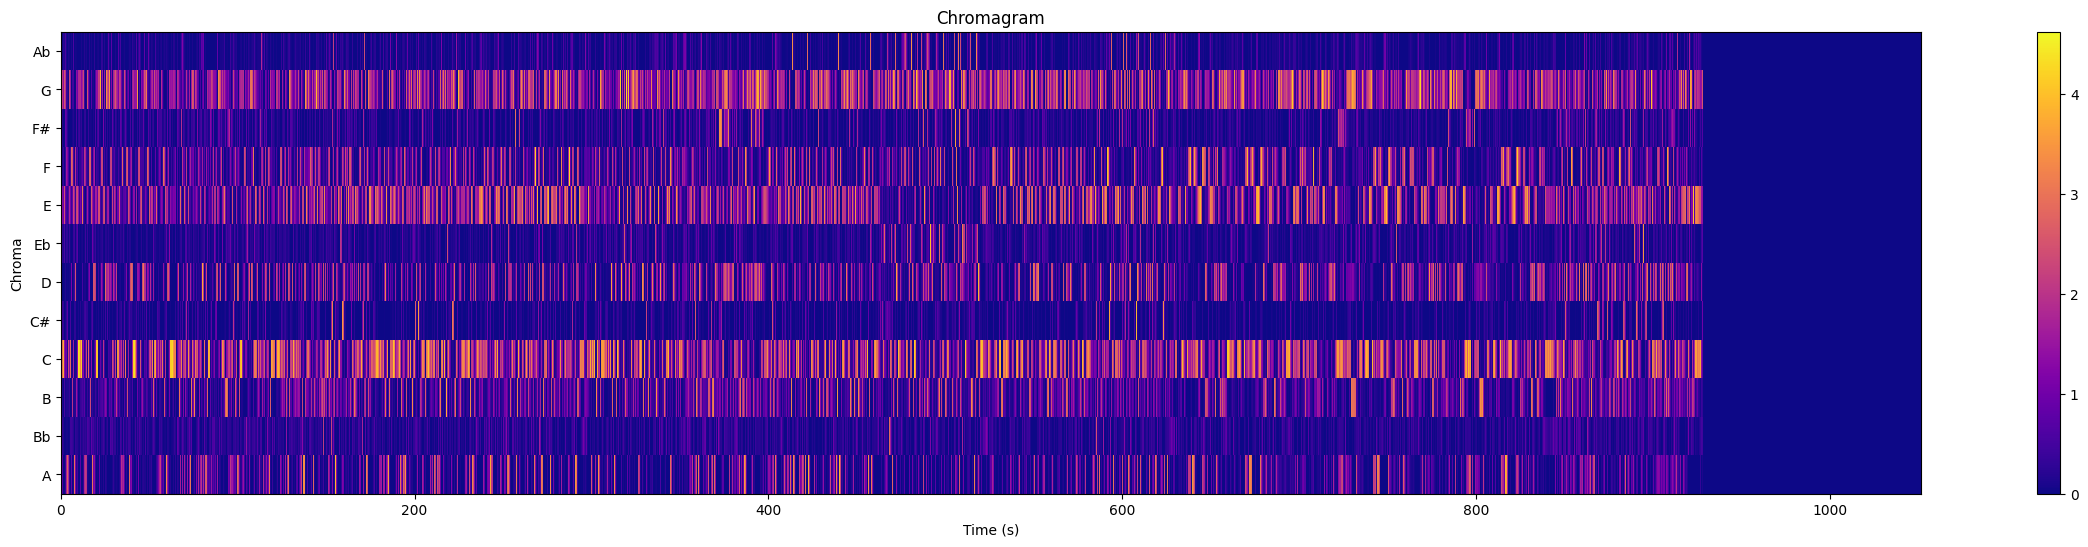

In [3]:
plt_chromagram(Zx_chroma.T, chromagram_segment_times)

In [ ]:
chords = ["N"] 
for c in chroma:
    chords.append(c + "maj")
for c in chroma:
    chords.append(c + "min") 

def plt_chords(chords_data, segment_times): 
    data = np.zeros((len(segment_times) , len(chords)))
    for i, one_chord in enumerate(chords_data):
        # print(i, chords, one_chord)
        # print(one_chord, chords)
        # print(chords[one_chord])
        y = chords.index(one_chord) 
        data[i, y] = 1

    plt.pcolormesh(segment_times, chords, data.T, cmap=plt.cm.plasma, shading='nearest')

df = pd.read_csv('chords/chords-chordino_piano_classical.csv', header=None)

csv_chords = df.iloc[:,2]

['A', 'Bb', 'B', 'C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab']
['N', 'Amaj', 'Bbmaj', 'Bmaj', 'Cmaj', 'C#maj', 'Dmaj', 'Ebmaj', 'Emaj', 'Fmaj', 'F#maj', 'Gmaj', 'Abmaj', 'Amin', 'Bbmin', 'Bmin', 'Cmin', 'C#min', 'Dmin', 'Ebmin', 'Emin', 'Fmin', 'F#min', 'Gmin', 'Abmin']
210        Bb_aug
211        Ab_min
212    E_maj_min7
213    A_maj_min7
214    D_maj_maj7
215    D_maj_min7
216    E_min_min7
217         G_maj
218    E_maj_min7
219    A_maj_maj7
220    D_maj_maj7
221         G_maj
222         E_maj
223    D_maj_maj7
224    E_min_min7
225         D_maj
226             N
227             N
228             N
229    C_maj_maj7
Name: 2, dtype: object


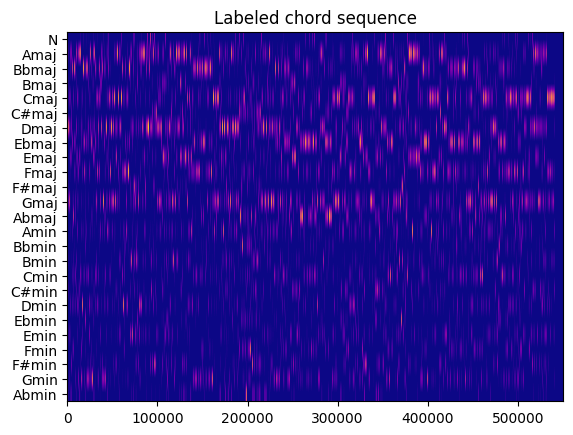

In [ ]:
chords_segment_times = np.array(df.iloc[:,1]) 
chords_simplified = [] 

for chord in csv_chords:  
    chord = chord.replace("dim", "min")
    chord = chord.replace("aug", "maj")
    chord = ''.join(chord.split("_")[:2])
    chords_simplified.append(chord) 

data = np.zeros((len(chromagram_segment_times), len(chords)))

overall_i = 0
for i, one_chord_i in enumerate(chords_simplified):
    # print(i)
    if i >= len(chords_segment_times)-1 or \
    chords_segment_times[i+1] == 0: 
        continue
    x = chords.index(one_chord_i) 
    # print(x)
    steps_next_chord = int((chords_segment_times[i+1] - chords_segment_times[i]) * 10)
    for j in range(steps_next_chord):
        data[overall_i + j, x] = 1
    overall_i += steps_next_chord

plt.title("Labeled chord sequence")
plt.yticks(range(len(chords)), chords)
plt.imshow(data.T, cmap=plt.cm.plasma, aspect='auto')

21223 21223
(25, 25)


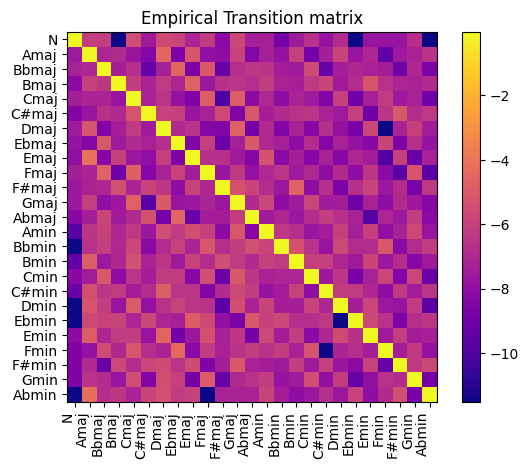

In [6]:
def empirical_transition_matrix(): 
    transition_matrix = np.zeros((25, 25)) 

    tot_chords = 0
    for i, chord in enumerate(chords_simplified): 
        # print(i, i >= len(chords_segment_times))
        if i >= len(chords_segment_times)-1 or \
            chords_segment_times[i+1] == 0: 
            continue
        next_chord = chords_simplified[i+1]
        x = chords.index(chord) 
        y = chords.index(next_chord) 
        steps_next_chord = (chords_segment_times[i+1] - chords_segment_times[i]) * 10

        transition_matrix[x, x] += steps_next_chord
        transition_matrix[x, y] += 1
        tot_chords += 1

    transition_matrix = np.array(transition_matrix)
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

    return transition_matrix

transition_matrix = empirical_transition_matrix()

plt.title("Empirical Transition matrix")
# plt.imshow(np.rot90(np.log(transition_matrix + 1e-5), k=3), cmap=plt.cm.plasma)
plt.imshow(np.log(transition_matrix + 1e-5), cmap=plt.cm.plasma)
plt.xticks(range(len(chords)), chords, rotation=90, ha='right')
plt.yticks(range(len(chords)), chords)
plt.colorbar()
plt.show()

In [7]:
# could calculate automatically 
chord_note_names = {
    'Amaj': ['A', 'C#', 'E'],
    'Bbmaj': ['Bb', 'D', 'F'],
    'Bmaj': ['B', 'Eb', 'F#'],
    'Cmaj': ['C', 'E', 'G'],
    'C#maj': ['C#', 'F', 'Ab'],
    'Dmaj': ['D', 'F#', 'A'],
    'Ebmaj': ['Eb', 'G', 'Bb'],
    'Emaj': ['E', 'Ab', 'B'],
    'Fmaj': ['F', 'A', 'C'],
    'F#maj': ['F#', 'Bb', 'C#'],
    'Gmaj': ['G', 'B', 'D'],
    'Abmaj': ['Ab', 'C', 'Eb'],  
    'Amin': ['A', 'C', 'E'],
    'Bbmin': ['Bb', 'C#', 'F'],
    'Bmin': ['B', 'D', 'F#'],
    'Cmin': ['C', 'Eb', 'G'],
    'C#min': ['C#', 'E', 'Ab'],
    'Dmin': ['D', 'F', 'A'],
    'Ebmin': ['Eb', 'F#', 'Bb'],
    'Emin': ['E', 'G', 'B'],
    'Fmin': ['F', 'Ab', 'C'],
    'F#min': ['F#', 'A', 'C#'],
    'Gmin': ['G', 'Bb', 'D'],
    'Abmin': ['Ab', 'B', 'Eb'], 
}

means = [
    np.ones(12) * 0.05
]

for chord, chord_note_name in chord_note_names.items():
    indexes = np.zeros(12) 
    # print(chord, chord_note_name)
    for note_name in chord_note_name: 
        # print(note_name)
        indexes[chroma.index(note_name)] = 3 #hmm 
    means.append(indexes) 

variances = np.ones((25, 12)) * 1

In [25]:
from hmmlearn import hmm
np.random.seed(42)

# maybe send the log 

lengths = np.diff(np.where(chromagram_segment_times == 0)[0], append=len(chromagram_segment_times))

model = hmm.GaussianHMM(
    n_components=25, 
    covariance_type="diag", 
    n_iter=1, 
    params="s", # start and covariances 
    init_params="s"
)

model.transmat_ = transition_matrix
model.means_ = means
model.covars_ = variances
# for 
model.fit(Zx_chroma, lengths=lengths)
# model.fit(Zx_chroma)

GaussianHMM(init_params='s', n_components=25, n_iter=1, params='s')

In [27]:
model.startprob_

array([2.45326032e-01, 4.34610442e-03, 7.40165074e-20, 5.56176902e-31,
       2.94875180e-05, 2.32476158e-42, 8.86691351e-02, 1.88576941e-18,
       6.14002441e-13, 7.84644208e-09, 3.43899574e-05, 3.39781172e-13,
       1.09232599e-08, 2.42496931e-18, 6.15231168e-09, 4.76004905e-06,
       8.34184678e-30, 6.61589504e-01, 1.43072983e-15, 5.53369615e-07,
       6.11242361e-23, 7.37723993e-37, 5.98646847e-15, 5.99049764e-13,
       8.22841616e-09])

In [28]:
predicted_chords = model.predict(Zx_chroma)

In [29]:
np.unique(predicted_chords, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 array([128540,  35842,  33575,   8384,  37328,   7497,  42915,  25895,
         20201,  31884,   6227,  38335,  14254,  12372,   5403,  11973,
         14952,   6613,  12335,   3904,  11698,  10802,   9684,  16785,
          3198]))

In [36]:
for i, mean in enumerate(means): 
    pred = model.predict([means[0], mean, mean, mean])
    # pred2 = model.predict([means[0], Zx_chroma[0]])
    print(i, pred[1], pred[2], pred[3])

0 0 0 0
1 1 1 1
2 2 2 2
3 3 3 3
4 4 4 4
5 5 5 5
6 6 6 6
7 7 7 7
8 8 8 8
9 9 9 9
10 10 10 10
11 11 11 11
12 12 12 12
13 13 13 13
14 14 14 14
15 15 15 15
16 16 16 16
17 17 17 17
18 18 18 18
19 19 19 19
20 20 20 20
21 21 21 21
22 22 22 22
23 23 23 23
24 24 24 24


In [42]:
print(data.shape, len(chords))

(550596, 25) 25


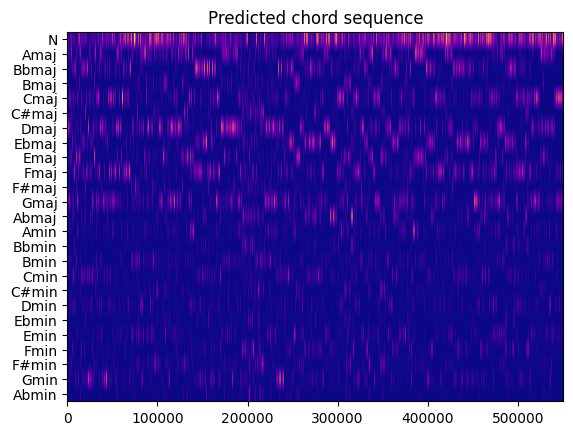

In [48]:
data = np.zeros((len(predicted_chords), len(chords)))
for i, one_chord_i in enumerate(predicted_chords):
    data[i, one_chord_i] = 1

plt.title("Predicted chord sequence")
plt.yticks(range(len(chords)), chords)
plt.imshow(data.T, cmap=plt.cm.plasma, aspect='auto')

In [32]:
correct = 0
overall_i = 0
tot_checked = 0
lower_correct = 0
lower_tot_checked = 0
continued_times = 0

# print(chords_simplified)
# do you handle the lengths during predictions? 
# no but easy to add... 
for i, one_chord_i in enumerate(chords_simplified):
    x = chords.index(one_chord_i) 

    # if continued_times > 10: 
    #     break

    if i >= len(chords_segment_times)-1:
        continue

    if chords_segment_times[i+1] == 0:
        j = 0
        while chromagram_segment_times[overall_i + j] != 0:
            # print("segment", chromagram_segment_times[overall_i + j])
            pred_chord = predicted_chords[overall_i + j] 
            j += 1 
            # print(i, j, chords[pred_chord], one_chord_i) 
            if pred_chord == x:
                correct += 1
            tot_checked += 1 
        overall_i += j
        continued_times += 1 

        continue

    steps_next_chord = round((chords_segment_times[i+1] - chords_segment_times[i]) * 10)
    for j in range(steps_next_chord):
        pred_chord = predicted_chords[overall_i + j] 
        if continued_times < 1:
            if pred_chord == x:
                correct += 1
            tot_checked += 1 

    # print(chords_segment_times[i+1] - chords_segment_times[i], steps_next_chord, overall_i)
    overall_i += steps_next_chord
    # if i > 400: 
    #     break

print(correct, tot_checked)
# print(lower_correct, lower_tot_checked)
print(correct / tot_checked)

1033 1403
0.7362794012829651


In [17]:
predicted_chords

array([17,  0,  0, ...,  0,  0,  0])

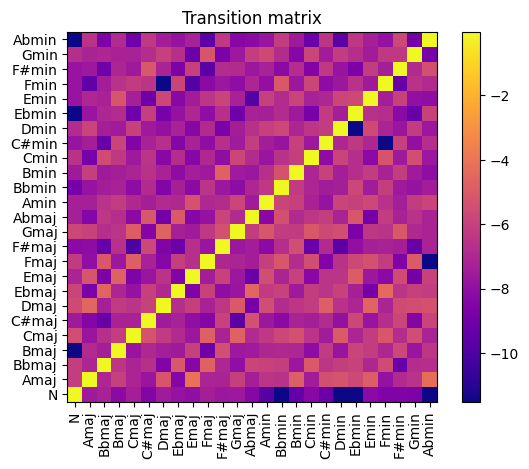

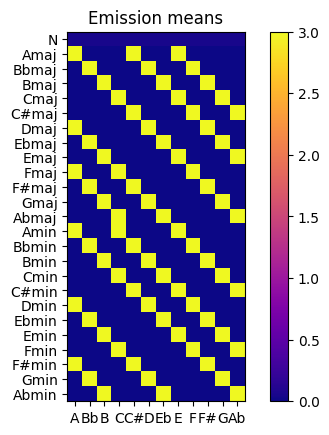


Initial state probabilities: (25,)
[5.02758187e-11 9.47518549e-04 1.56067610e-20 2.91904625e-31
 6.88398472e-06 1.59369644e-42 2.35916605e-02 7.16536801e-19
 2.78220039e-13 1.77669263e-09 1.07170691e-05 1.00890189e-13
 6.91333840e-09 7.44606220e-18 4.78127595e-06 8.98171317e-06
 4.95848443e-30 9.75253417e-01 2.86839406e-13 1.75388605e-04
 3.35968444e-23 5.94617977e-37 4.86594834e-15 5.10160011e-13
 6.42438477e-07] 1.0


In [18]:
# chord_labels = ["None", "Cmaj", "Cmin", "C#maj", "C#min", "Dmaj", "Dmin", "Ebmaj", "Ebmin", "Emaj", "Emin", "Fmaj", "Fmin", "F#maj", "F#min", "Gmaj", "Gmin", "G#maj", "G#min", "Amaj", "Amin", "Bbmaj", "Bbmin", "Bmaj", "Bmin"]
# chroma = ["C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab", "A", "Bb", "B"]

plt.title("Transition matrix")
plt.imshow(np.rot90(np.log(model.transmat_+ 1e-5), k=1), cmap=plt.cm.plasma)
# plt.imshow(np.log(model.transmat_+ 1e-5), cmap=plt.cm.plasma)
plt.xticks(range(len(chords)), chords, rotation=90)
plt.yticks(range(len(chords)), reversed(chords))
plt.colorbar()
plt.show()

plt.title("Emission means")
plt.imshow(model.means_, cmap=plt.cm.plasma)
plt.xticks(range(len(chroma)), chroma)
plt.yticks(range(len(chords)), chords)
plt.colorbar()
plt.show()

# so it's currently always starting with Amaj 
# Get initial state probabilities
initial_probs = model.startprob_
print("\nInitial state probabilities:", initial_probs.shape)  # (24,)
print(initial_probs, initial_probs.sum())